## AIF module demo

### Import modules

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..\\src')
%load_ext autoreload
%autoreload 2

### Classic Parker AIF
Create a Parker AIF object. This can be used to return arterial plasma Gd concentration for any time points.

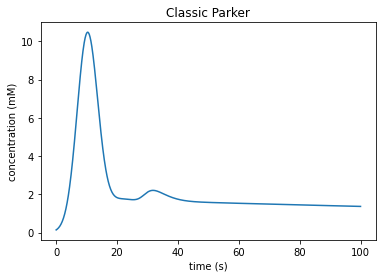

In [11]:
from dce import aifs
# Create the AIF object
aif = aifs.parker(hct=0.42)

# Plot concentration for specific times
t = np.linspace(0.,100.,1000)
c_ap = aif.c_ap(t)
plt.plot(t, c_ap)
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Classic Parker');

### Patient-specific AIF
Create an individual AIF object based on a series of time-concentration data points. 
The object can then be used to generate concentrations at arbitrary times.

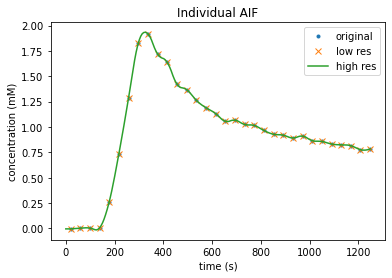

In [12]:
# define concentration-time measurements
t = np.array([19.810000,59.430000,99.050000,138.670000,178.290000,217.910000,257.530000,297.150000,336.770000,376.390000,416.010000,455.630000,495.250000,534.870000,574.490000,614.110000,653.730000,693.350000,732.970000,772.590000,812.210000,851.830000,891.450000,931.070000,970.690000,1010.310000,1049.930000,1089.550000,1129.170000,1168.790000,1208.410000,1248.030000])
c_p = np.array([-0.004937,0.002523,0.002364,0.005698,0.264946,0.738344,1.289008,1.826013,1.919158,1.720187,1.636699,1.423867,1.368308,1.263610,1.190378,1.132603,1.056400,1.066964,1.025331,1.015179,0.965908,0.928219,0.919029,0.892000,0.909929,0.865766,0.857195,0.831985,0.823747,0.815591,0.776007,0.783767])

# create AIF object from measurements
aif = aifs.patient_specific(t, c_p)

# get AIF conc at original and high temporal resolutions
c_p_lowres = aif.c_ap(t)
t_highres = np.linspace(0., max(t), 200)
c_p_highres = aif.c_ap(t_highres)
plt.plot(t, c_p, '.', label='original')
plt.plot(t, c_p_lowres, 'x', label='low res')
plt.plot(t_highres, c_p_highres, '-', label='high res')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('concentration (mM)')
plt.title('Individual AIF');